In [1]:
import numpy as np
from abc import ABC, abstractmethod
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, FunctionTransformer

In [2]:
class Regression(ABC):
    @abstractmethod
    def __init__(self, X, y):
        ...
        
    @abstractmethod
    def __call__(self, x):
        ...
        
    @abstractmethod
    def coef(self, x):
        ...

In [3]:
class MyLinearRegression(Regression):
    def __init__(self, X, Y):
        a = [[np.sum(x**2 for x in X), sum(X)],[sum(X), len(X)]]
        b = [sum(x*y for x,y in zip(X,Y)), sum(Y)]
        self.b0, self.b1 = np.linalg.solve(a, b)
        
    def __call__(self, x):
        return self.b0*x+self.b1
    
    def coef(self):
        return (self.b0, self.b1)
        

In [4]:
X = np.array([51, 67, 84, 81, 101, 109, 71, 97, 109, 51, 105, 89])
Y =  np.array([25, 30, 43, 44, 57, 58, 43, 46, 62, 45, 55, 45])

My coef: (0.4389310995344327, 8.957077831045902)
Sklearn coef: (array([0.4389311]), 8.957077831045893)


/var/folders/kk/d31_299153q5r_m83569d_k40000gq/T/ipykernel_68591/2070838927.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  a = [[np.sum(x**2 for x in X), sum(X)],[sum(X), len(X)]]


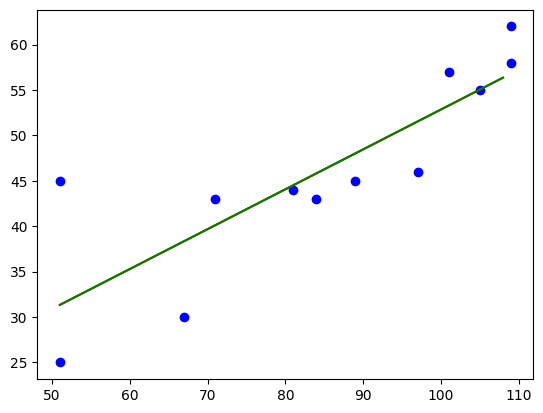

In [5]:
model = MyLinearRegression(X,Y)
xs = np.arange(np.min(X), np.max(X), 1)
reg = LinearRegression().fit(X.reshape(-1, 1), Y)
plt.plot(X, Y, 'bo', xs, model(xs), 'r', xs, reg.predict(xs.reshape(-1, 1)), "g")
print(f"My coef: {model.coef()}")
print(f"Sklearn coef: {reg.coef_, reg.intercept_}")


In [6]:
class MyPolynomialRegression(Regression):
    def __init__(self, X, Y):
        a = [[np.sum(x**4 for x in X), np.sum(x**3 for x in X), np.sum(x**2 for x in X)],
             [np.sum(x**3 for x in X), np.sum(x**2 for x in X), np.sum(X)],
             [np.sum(x**2 for x in X), np.sum(X), len(X)]]
        b = [sum(x**2*y for x,y in zip(X,Y)), sum(x*y for x,y in zip(X,Y)),sum(Y)]
        self.b0, self.b1, self.b2 = np.linalg.solve(a, b)
        
    def __call__(self, x):
        return self.b0*x**2+self.b1*x+self.b2
    
    def coef(self):
        return (self.b0, self.b1, self.b2)

In [7]:
X = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0])
Y =  np.array([0.4, 0.3, 1.0, 1.7, 2.1, 3.4, 4.1, 5.8, 7.7, 9.4, 11.4, 13.6, 15.6, 18.6, 21.2, 24.1])

/var/folders/kk/d31_299153q5r_m83569d_k40000gq/T/ipykernel_68591/837626652.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  a = [[np.sum(x**4 for x in X), np.sum(x**3 for x in X), np.sum(x**2 for x in X)],
/var/folders/kk/d31_299153q5r_m83569d_k40000gq/T/ipykernel_68591/837626652.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  [np.sum(x**3 for x in X), np.sum(x**2 for x in X), np.sum(X)],
/var/folders/kk/d31_299153q5r_m83569d_k40000gq/T/ipykernel_68591/837626652.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  [np.sum(x**2 for x in X), np.sum(X), len(X)]]


My coef: (0.39551820728291526, -0.173081232493015, 0.2653571428571681)
Sklearn coef: (array([-0.17308123,  0.39551821]), 0.2653571428571375)


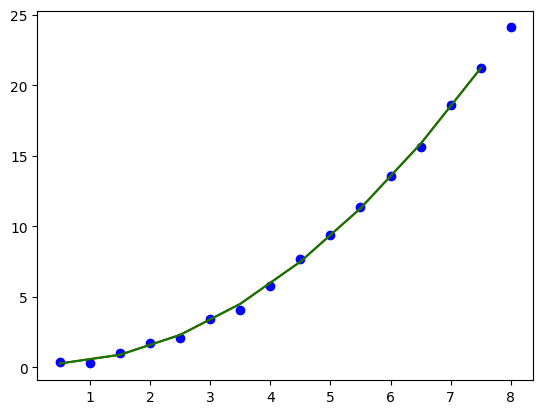

In [8]:
model = MyPolynomialRegression(X,Y)
xs = np.arange(np.min(X), np.max(X), 1)
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features =poly.fit_transform(X.reshape(-1, 1), Y)
reg = LinearRegression().fit(poly_features, Y)
plt.plot(X, Y, 'bo', xs, model(xs), 'r', xs, reg.predict(poly.transform(xs.reshape(-1, 1))), "g")
print(f"My coef: {model.coef()}")
print(f"Sklearn coef: {reg.coef_, reg.intercept_}")

In [9]:
class MyLogRegression(Regression):
    def __init__(self, X, Y):
        a = [[np.sum(np.log(x)**2 for x in X), np.sum(np.log(x) for x in X)],[np.sum(np.log(x) for x in X), len(X)]]
        b = [sum(np.log(x)*y for x,y in zip(X,Y)), sum(Y)]
        self.b0, self.b1 = np.linalg.solve(a, b)
        
    def __call__(self, x):
        return self.b0*np.log(x)+self.b1
    
    def coef(self):
        return (self.b0, self.b1)

In [10]:
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
Y =  np.array([2.11, 2.45, 2.61, 2.73, 2.75, 2.81, 2.87, 2.91, 2.96, 3.03, 3.05, 3.12])

My coef: (0.37601325400366553, 2.1570452032514122)
Sklearn coef: (array([0.37601325]), 2.1570452032514065)


/var/folders/kk/d31_299153q5r_m83569d_k40000gq/T/ipykernel_68591/368564231.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  a = [[np.sum(np.log(x)**2 for x in X), np.sum(np.log(x) for x in X)],[np.sum(np.log(x) for x in X), len(X)]]


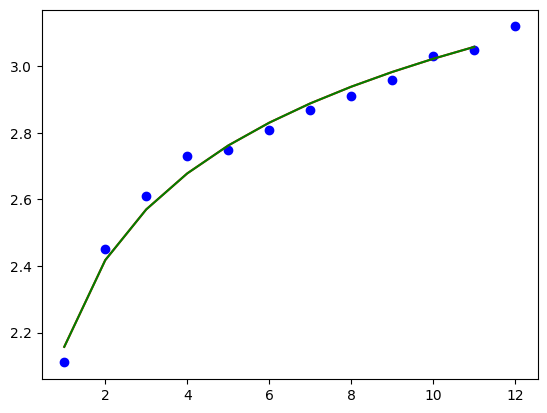

In [11]:
model = MyLogRegression(X,Y)
xs = np.arange(np.min(X), np.max(X), 1)
log = FunctionTransformer(np.log)
log_features = log.fit_transform(X.reshape(-1, 1), Y)
reg = LinearRegression().fit(log_features, Y)
plt.plot(X, Y, 'bo', xs, model(xs), 'r', xs, reg.predict(log.transform(xs.reshape(-1, 1))), "g")
print(f"My coef: {model.coef()}")
print(f"Sklearn coef: {reg.coef_, reg.intercept_}")

In [12]:
class MyExpRegression(Regression):
    def __init__(self, X, Y):
        a = [[np.sum(np.exp(0.1*x)**2 for x in X), np.sum(np.exp(0.1*x) for x in X)],[np.sum(np.exp(0.1*x) for x in X), len(X)]]
        b = [sum(np.exp(0.1*x)*y for x,y in zip(X,Y)), sum(Y)]
        self.b0, self.b1 = np.linalg.solve(a, b)
        
    def __call__(self, x):
        return self.b0*np.exp(0.1*x)+self.b1
    
    def coef(self):
        return (self.b0, self.b1)

In [13]:
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
Y =  np.array([0.10, 0.21, 0.43, 0.51, 0.62, 0.81, 1.01, 1.23, 1.47, 1.53, 1.75, 2.25])

My coef: (0.9134950750842943, -0.8626266973823451)
Sklearn coef: (array([0.91349508]), -0.8626266973823452)


/var/folders/kk/d31_299153q5r_m83569d_k40000gq/T/ipykernel_68591/1404882924.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  a = [[np.sum(np.exp(0.1*x)**2 for x in X), np.sum(np.exp(0.1*x) for x in X)],[np.sum(np.exp(0.1*x) for x in X), len(X)]]


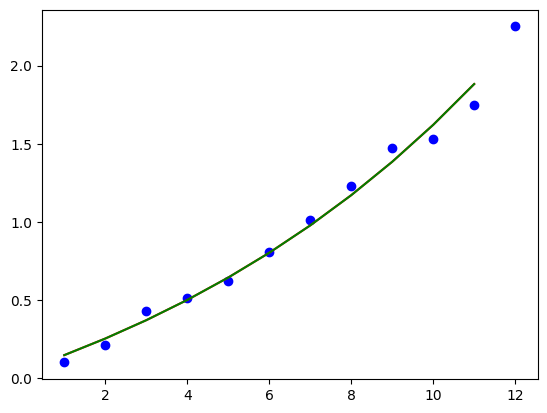

In [14]:
model = MyExpRegression(X,Y)
xs = np.arange(np.min(X), np.max(X), 1)
exp = FunctionTransformer(lambda x: np.exp(x*0.1))
exp_features = exp.fit_transform(X.reshape(-1, 1), Y)
reg = LinearRegression().fit(exp_features, Y)
plt.plot(X, Y, 'bo', xs, model(xs), 'r', xs, reg.predict(exp.transform(xs.reshape(-1, 1))), "g")
print(f"My coef: {model.coef()}")
print(f"Sklearn coef: {reg.coef_, reg.intercept_}")

In [15]:
class MySinRegression(Regression):
    def __init__(self, X, Y):
        a = [[np.sum(np.sin(8*x)**2 for x in X), np.sum(x*np.sin(8*x) for x in X), np.sum(np.sin(8*x) for x in X)],
             [np.sum(x*np.sin(8*x) for x in X), np.sum(x**2 for x in X), np.sum(X)],
             [np.sum(np.sin(8*x) for x in X), np.sum(X), len(X)]]
        b = [sum(np.sin(8*x)*y for x,y in zip(X,Y)), sum(x*y for x,y in zip(X,Y)),sum(Y)]
        self.b0, self.b1, self.b2 = np.linalg.solve(a, b)
        
    def __call__(self, x):
        return self.b0*np.sin(8*x)+self.b1*x+self.b2
    
    def coef(self):
        return (self.b0, self.b1, self.b2)

In [16]:
X = np.array([2.11, 2.45, 2.61, 2.73, 2.75, 2.81, 2.87, 2.91, 2.96, 3.03, 3.05, 3.12])
Y =  np.array([0.10, 0.21, 0.43, 0.51, 0.62, 0.81, 1.01, 1.23, 1.47, 1.53, 1.75, 2.25])

My coef: (-0.19892539744717713, 1.9473972239268795, -4.494368586799944)
Sklearn coef: (array([ 1.94739722, -0.1989254 ]), -4.494368586799679)


/var/folders/kk/d31_299153q5r_m83569d_k40000gq/T/ipykernel_68591/1929850264.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  a = [[np.sum(np.sin(8*x)**2 for x in X), np.sum(x*np.sin(8*x) for x in X), np.sum(np.sin(8*x) for x in X)],
/var/folders/kk/d31_299153q5r_m83569d_k40000gq/T/ipykernel_68591/1929850264.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  [np.sum(x*np.sin(8*x) for x in X), np.sum(x**2 for x in X), np.sum(X)],
/var/folders/kk/d31_299153q5r_m83569d_k40000gq/T/ipykernel_68591/1929850264.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  [np.sum(np.sin(8*x) for x in X)

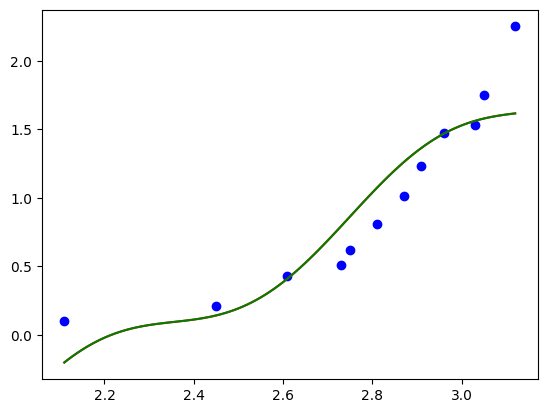

In [17]:
model = MySinRegression(X,Y)
xs = np.arange(np.min(X), np.max(X), 0.01)
sin = lambda X: np.array([[x, np.sin(8*x)] for x in X])
sin_features = sin(X)
reg = LinearRegression().fit(sin_features, Y)
plt.plot(X, Y, 'bo', xs, model(xs), 'r', xs, reg.predict(sin(xs)), "g")
print(f"My coef: {model.coef()}")
print(f"Sklearn coef: {reg.coef_, reg.intercept_}")